<a href="https://colab.research.google.com/github/BernasconiLorenzo06/MAchine_Learnin_verifica/blob/main/ML_classificazione_e_rergressione.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#classificazione : utilizza dati discreti, ed è utilizzato per una classe

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/spambase.data', header = None)
df

,0,1,2,3,4,5,6,7,8,9,...,48,49,50,51,52,53,54,55,56,57
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.000,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.000,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.010,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.000,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.000,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4596,0.31,0.00,0.62,0.0,0.00,0.31,0.00,0.00,0.00,0.00,...,0.000,0.232,0.0,0.000,0.000,0.000,1.142,3,88,0
4597,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.000,0.000,0.0,0.353,0.000,0.000,1.555,4,14,0
4598,0.30,0.00,0.30,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.102,0.718,0.0,0.000,0.000,0.000,1.404,6,118,0
4599,0.96,0.00,0.00,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.000,0.057,0.0,0.000,0.000,0.000,1.147,5,78,0


In [ ]:
import numpy as np
dfnp = df.to_numpy()
x=dfnp[:,0:-1]
y=dfnp[:,-1] #targer che è ultimo

#Print class frequencies through collections counter
import collections
collections.Counter(y)

Counter({1.0: 1813, 0.0: 2788})

In [ ]:
print(x[:10])
print(f'y = {y[:10]}')

[[0.000e+00 6.400e-01 6.400e-01 0.000e+00 3.200e-01 0.000e+00 0.000e+00
  0.000e+00 0.000e+00 0.000e+00 0.000e+00 6.400e-01 0.000e+00 0.000e+00
  0.000e+00 3.200e-01 0.000e+00 1.290e+00 1.930e+00 0.000e+00 9.600e-01
  0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
  0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
  0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
  0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
  0.000e+00 0.000e+00 7.780e-01 0.000e+00 0.000e+00 3.756e+00 6.100e+01
  2.780e+02]
 [2.100e-01 2.800e-01 5.000e-01 0.000e+00 1.400e-01 2.800e-01 2.100e-01
  7.000e-02 0.000e+00 9.400e-01 2.100e-01 7.900e-01 6.500e-01 2.100e-01
  1.400e-01 1.400e-01 7.000e-02 2.800e-01 3.470e+00 0.000e+00 1.590e+00
  0.000e+00 4.300e-01 4.300e-01 0.000e+00 0.000e+00 0.000e+00 0.000e+00
  0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
  0.000e+00 7.000e-02 0.000e+00 0.000e+00 0.000e+00

In [ ]:
from sklearn.model_selection import train_test_split # suddivide le osservazioni nei due insiemi

X_train, X_test, y_train, y_test = train_test_split(x, y,
                                                    test_size = 0.30, # by default is 75%-25%
                                                    # shuffle is set True by default,
                                                    stratify = y, # per mantenere le proporzioni che ci sono nei dati di partenza
                                                    random_state = 123) # fix random seed for replicability

In [ ]:
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((3220, 57), (3220,), (1381, 57), (1381,))

In [ ]:
np.set_printoptions(suppress=True)
print(X_train[:10])
print(f'y_train = {y_train[:10]}')

[[  0.      0.9     0.      0.      0.      0.      0.      0.      0.
    0.      0.      0.      0.      0.      0.      0.9     0.      1.81
    3.63    0.      2.72    0.      0.      0.      0.      0.      0.
    0.      0.      0.      0.      0.      0.      0.      0.      0.
    0.      0.      0.      0.      0.      0.      0.      0.      0.9
    0.      0.      0.      0.      0.      0.      0.17    0.17    0.
    6.266  41.     94.   ]
 [  0.      0.      0.      0.      0.      0.      0.      0.      0.
    1.      0.      0.      0.      0.      0.      0.      0.      0.
    2.      0.      0.      0.      0.      0.      0.      0.      0.
    0.      0.      0.      0.      0.      0.      0.      0.      0.
    1.      0.      0.      0.      0.      0.      0.      0.      0.
    5.      0.      0.      0.      0.      0.      0.      0.      0.
    2.413  15.     70.   ]
 [  0.      0.      0.      0.      0.      0.      0.      0.      0.
    0.      0.      

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
neigh = KNeighborsClassifier(n_neighbors=5)

In [ ]:
neigh.fit(X_train, y_train)


KNeighborsClassifier()

In [ ]:
predict = neigh.predict(X_test)

In [ ]:
print(f'dati predetti dal metodo =                {predict[:10]}') # dati predetti dal metodo
print(f'dati reali presenti nel dataset di test = {y_test[:10]}') # dati effettivi presenti nel test set

dati predetti dal metodo =                [1. 0. 0. 0. 0. 0. 1. 1. 1. 0.]
dati reali presenti nel dataset di test = [1. 0. 1. 0. 0. 0. 0. 0. 0. 0.]


In [ ]:

!pip install mlxtend

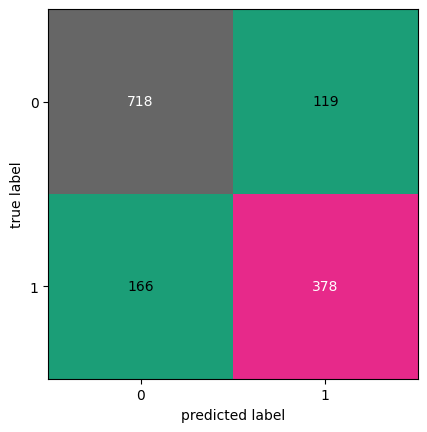

In [ ]:

# valutiamo il nostro metodo:
from mlxtend.plotting import plot_confusion_matrix
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
# visualizziamo la confusion matrix
plot_confusion_matrix(confusion_matrix(y_test, predict), cmap=plt.cm.Dark2)
plt.show()

In [ ]:
print(classification_report(y_test, predict))

              precision    recall  f1-score   support

         0.0       0.81      0.86      0.83       837
         1.0       0.76      0.69      0.73       544

    accuracy                           0.79      1381
   macro avg       0.79      0.78      0.78      1381
weighted avg       0.79      0.79      0.79      1381



#regressione è utilizzata per valori continui (quando un valore puo assumere tutti i valori  in un intervallo )

In [ ]:
from google.colab import drive
drive.mount('/content/drive')n ' '

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model

In [ ]:
data = pd.read_excel("/content/drive/MyDrive/Real estate valuation data set.xlsx")
data.head()


,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.916667,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.916667,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583333,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500000,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833333,5.0,390.56840,5,24.97937,121.54245,43.1


In [ ]:
dfnp = data.to_numpy()
x=dfnp[:,0:-1]
y=dfnp[:,-1] #targer che è ultimo

In [ ]:
from sklearn.model_selection import train_test_split # suddivide le osservazioni nei due insiemi

X_train, X_test, y_train, y_test = train_test_split(x, y,
                                                    test_size = 0.33,
                                                    random_state = 123) # fix random seed for replicability


In [ ]:

X_train.shape,y_train.shape,X_test.shape,y_test.shape

((277, 7), (277,), (137, 7), (137,))

In [ ]:

print(X_train[:10])
print(f'y_train = {y_train[:10]}')

[[ 106.        2012.8333333    0.         292.9978       6.
    24.97744    121.54458  ]
 [ 197.        2013.          22.8        707.9067       2.
    24.981      121.54713  ]
 [ 356.        2013.25         3.8        383.8624       5.
    24.98085    121.54391  ]
 [ 218.        2012.9166667   28.         372.6242       6.
    24.97838    121.54119  ]
 [  20.        2012.6666667    1.5         23.38284      7.
    24.96772    121.54102  ]
 [  30.        2013.0833333    7.1        451.2438       5.
    24.97563    121.54694  ]
 [  79.        2012.9166667   38.2        552.4371       2.
    24.97598    121.53381  ]
 [ 371.        2012.75        15.9        289.3248       5.
    24.98203    121.54348  ]
 [ 151.        2013.25        35.8        170.7311       7.
    24.96719    121.54269  ]
 [ 327.        2013.5          4.1         56.47425      7.
    24.95744    121.53711  ]]
y_train = [71.  36.6 60.7 40.8 47.7 57.1 29.8 42.1 48.5 62.1]


In [ ]:
regr = linear_model.LinearRegression()
regr.fit(X_train,y_train)
predict = regr.predict(X_test)

In [ ]:
print(f'dati predetti dal metodo = {predict[:10].round(decimals=2)}') # dati predetti dal metodo
print(f'dati reali presenti nel dataset di test = {y_test[:10]}') # dati effettivi presenti nel test set


dati predetti dal metodo = [42.43 45.76 39.35 40.74 49.45 53.88 42.23 46.19 27.79 39.24]
dati reali presenti nel dataset di test = [44.3 41.2 37.8 32.9 52.2 58.1 37.5 51.7 23.8 50.5]


In [ ]:
from sklearn.metrics import r2_score, mean_squared_error

# The coefficients
print('Coefficients: \n', regr.coef_)

# The mean squared error
print('Mean squared error: %.2f' %mean_squared_error(y_test, predict))
print('Coefficient of determination: %.2f' %r2_score(y_test, predict))

Coefficients: 
 [ -0.00472981   5.23237095  -0.26133505  -0.00508999   1.04385943
 204.48396921 -34.41838008]
Mean squared error: 52.21
Coefficient of determination: 0.67


#replace e drop

In [ ]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/bank-full.csv',sep = ";")
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [ ]:
#facciamo il replace di maritial
df = df.replace({"divorced":0,"married":1,"single":2,"unknown":3})
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,1,tertiary,no,2143,yes,no,3,5,may,261,1,-1,0,3,no
1,44,technician,2,secondary,no,29,yes,no,3,5,may,151,1,-1,0,3,no
2,33,entrepreneur,1,secondary,no,2,yes,yes,3,5,may,76,1,-1,0,3,no
3,47,blue-collar,1,3,no,1506,yes,no,3,5,may,92,1,-1,0,3,no
4,33,3,2,3,no,1,no,no,3,5,may,198,1,-1,0,3,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,1,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,3,yes
45207,71,retired,0,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,3,yes
45208,72,retired,1,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,1,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,3,no


In [ ]:
#eliminiamo contact e dateweek
df = df.drop(["y","contact","day"],axis = "columns")
df

,age,job,marital,education,default,balance,housing,loan,month,duration,campaign,pdays,previous,poutcome
0,58,management,1,tertiary,no,2143,yes,no,may,261,1,-1,0,3
1,44,technician,2,secondary,no,29,yes,no,may,151,1,-1,0,3
2,33,entrepreneur,1,secondary,no,2,yes,yes,may,76,1,-1,0,3
3,47,blue-collar,1,3,no,1506,yes,no,may,92,1,-1,0,3
4,33,3,2,3,no,1,no,no,may,198,1,-1,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,1,tertiary,no,825,no,no,nov,977,3,-1,0,3
45207,71,retired,0,primary,no,1729,no,no,nov,456,2,-1,0,3
45208,72,retired,1,secondary,no,5715,no,no,nov,1127,5,184,3,success
45209,57,blue-collar,1,secondary,no,668,no,no,nov,508,4,-1,0,3


In [ ]:
#elimino i valori nulli di una colonna
df = df.drop(df[(df['poutcome'] == "unknown")].index)
df

,age,job,marital,education,default,balance,housing,loan,month,duration,campaign,pdays,previous,poutcome
0,58,management,1,tertiary,no,2143,yes,no,may,261,1,-1,0,3
1,44,technician,2,secondary,no,29,yes,no,may,151,1,-1,0,3
2,33,entrepreneur,1,secondary,no,2,yes,yes,may,76,1,-1,0,3
3,47,blue-collar,1,3,no,1506,yes,no,may,92,1,-1,0,3
4,33,3,2,3,no,1,no,no,may,198,1,-1,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,1,tertiary,no,825,no,no,nov,977,3,-1,0,3
45207,71,retired,0,primary,no,1729,no,no,nov,456,2,-1,0,3
45208,72,retired,1,secondary,no,5715,no,no,nov,1127,5,184,3,success
45209,57,blue-collar,1,secondary,no,668,no,no,nov,508,4,-1,0,3
